## Parametri e iperparametri 
Sappiamo che esiste il metodo di suddivisione dei dati a disposizione, detto **hold out**, in *training set* (tipicamente il 70%), serve per trovare gli iperparametri e *validation set* (30%), il quale serve per fare *tuning* degli *iperparametri*. Ad esempio serve per trovare
- Il *learning rate* adatto
- Il *grado del polinomio* che meglio modella il dominio
Si chiamano cosi poiché non è il modello di regressione che li definisce, dobbiamo stabilirli noi, ma cion nonostante, servono a predire correttamente.
### Come trovare i migliori iperparametri
Fondamentalmente questa ricerca è del tutto empirica. Si fanno più esperimenti facendo variare un iperparametro alla volta, controllando qual'è quello che fitta meglio. Pertanto in qualche modo, il modello viene ritagliato anche sul validation set (anche se indirettamente, poiché controllato da noi: il modello non si modifica autonomamente sul validation set), poiché è su quello che si fa *fine tuning* del modello. Pertanto questo aspetto non va sottovalutato, in quanto cerchiamo di minimizzare l'errore, osservando come si comporta su nuovi dati. A questo proposito, non è sufficiente suddividere il dataset in due parti, per questo motivo si suddivide ulteriormente in 
- training set: per trainare il modello
- validation set: usato per trovare gli iperparametri migliori
- test set: il modello trovato, che sembra il più opportuno sulla base degli iperparametri trovati, va testato per verificare che il modello dia risultati quanto meno compatibili con quelli del validation set.
È ovvio che se anche sul test set ci mettiamo a correggere gli iperparametri, la procedura di suddivisione in tre parti non serve a nulla.

#### Cosa fare se il test set non va
Qualora il test set non desse i risultati sperati, anche modificando gli iperparametri sulla base di quanto visto con il validation set, la cosa migliore da fare è andare a modificare il modello magari rivedendo le feature: togliendone alcune, o aggiungendone altre.

### K-Fold Cross Validation
Il dataset viene suddiviso in $k$ sottoinsiemi disgiunti. Un sottoinsieme viene usato come validation set, mentre gli altri $k-1$ come training set.
Questo approccio verrà ripetuto permutando tutti i set, cioè praticamente si esegue $k$ volte, ogni volta scegliendo un fold-set differente come validation.
In altre parole se avessimo 6 set 

| Fold 1 | Fold 2 | ... | Fold 6 |
|:------:|:------:|:---:|:------:|

- all'iterazione (1) si fissa *fold 1* come validation set, si usano (*fold 1*, $\cdots$, *fold 6*) come set per trainare il modello.
- all'iterazione (2) si fissa *fold 2* come validation e (*fold 1, fold 3, $\cdots$, *fold 6*) come training set.
- ...

E si prosegue cosi fino a rendere il *Fold 6* validation. In questo modo si producono tanti modelli quanti sono i fold creati, in questo caso 6. Le performance finali saranno date dalla media delle performance di ciascuno dei $k$ modelli.
<img src="imgs/kfoldcross.png" alt="K-Fold Cross Validation" width=500>

#### K-Fold Cross Validation stratificata
Si parla di *K-Fold Cross Validation stratificata* quando imponiamo che tutti i fold siano rappresentati con le stesse caratteristiche. Cioè se ad esempio avessi un modello che valuta l'affidabilità di persone a cui affiare credito (utile alle banche), con *K-Fold Cross Validation stratificata* sarò sicuro che ogni fold di persone avrà la stessa distribuzione di utenti, cioè lo stesso numero di donne, bambini e uomini, ad esempio, stesso numero di nuclei famigliari, ecc.

### Regolarizzazione
Uno dei problemi che insorgono all'uamentare il grado del polinomio, è che i coefficienti $\theta_i$ crescono enormemente. Questo è un problema poiché più abbiamo a che fare con grandi valori e maggiore sarà l'imprecisione del modello.
A tal proposito esiste questo metodo detto di **regolarizzazione** che serve proprio a mantenere bassi i parametri da apprendere, indipendentemente dalla complessità del modello. Il bello di questa tecnica è che è applicabile a qualsiasi modello, anche non di regressione (ad esempio nelle reti neurali).
#### Ridge regression
Per quanto riguarda il caso di regressione lineare, esiste un modello, detto **ridge regression** che incorpora in se la regolarizzazione.
In termini ipotetici, con grado del polinomio pari a $+\infty$ potremmo modellare qualsiasi fenomeno perfettamente poiché ogni punto in aggiunta sarà raggiunto perfettamente dalla curva, tuttavia per gradi già prossimi al 50, i $\theta$ raggiungono valori come
$$
    \theta = -3.88\times 10^6
$$
e ciò provoca forti oscillazioni nella regressione peggiorandone l'accuratezza.
Quello che fa *ridge regression* è cercare di minimizzare, oltre alla funzione d'errore, anche il prodotto
$$
        \lambda \cdot \theta
$$
con $\lambda$ *iperparametro* tale che $0 \leq \lambda < \infty$. Ovviamente se $\lambda = 0$ non avviene alcuna regolarizzazione. Ineffetti questo iperparametro serve proprio a stabilire quanto debba incidere sul modello tale regolarizzazione, se decidiamo che $\lambda = 0$ vuol dire che non ci interessa regolarizzare, viceversa, maggiore sarà questo valore, e maggiore risulterà il peso che ha sul modello.
In altre parole si cerca di fare quanto segue
$$
    \underset{\theta}{\text{minimize}} \sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})^2 + \lambda\|\theta\|^2_2
$$
con 
$$
    \lambda\|\theta\|^2_2 = \sum_{i=0}^{n-1}\theta_i^2
$$
con $n =$ numero parametri $\theta$ (in altre parole il grado del polinomio).
In altre parole quello che accade è che alla classica funzione errore da minimizzare ($\sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})^2$), si somma lambda per la **norma al quadrato di $\theta$**, ovvero la sommatoria dell'errore quadratico medio di ogni parametro $\theta_i$, cioè $\sum_{i=0}^{n-1}\theta_i^2$.
Dunque in questo modo forziamo il modello a trovare i theta che minimizzano l'errore, ma che siano anche i più prossimi a 0. In altre parole si riduce a un problema di minimo vincolato (programmazione lineare di ricerca operativa), in cui però il vincolo entra a far parte della funzione obbiettivo.

Come al solito per minimizzare una funzione ne calcoliamo il gradiente (derivando), che nel nostro caso diventa

$$
    \nabla_{\theta} \left(\sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})^2 + \lambda\|\theta\|^2_2\right) = 2X^T (X\theta - y) + 2\lambda\theta
$$

da cui, eguagliando a zero otteniamo

$$
2X^TX \theta + 2\lambda \theta = 2X^Ty \Rightarrow \theta = (X^T X + \lambda I)^{-1}X^Ty
$$

dove come sempre $X$ è la matrice dei coefficienti noti, e $y$ è il vettore dei valori da predire.

Graficamente otterremmo che, senza regolarizzazione, per un polinomio di grado 50, la curva sarà la seguente
<img src="imgs/noreg.PNG" alt="Grado 50 senza regolarizzazione" width=400>
mentre con regolarizzazione $\lambda = 1$ 
<img src="imgs/reg.PNG" alt="Grado 50 con regolarizzazione" width=400>

#### Come individuare il $\lambda$ migliore
Il metodo più semplice è usare k-fold cross validation. In python $\lambda$ è un iperparametro chiamato $\alpha$ (apha).

```python
from sklearn.linear_model import RidgeCV
...
alphas = 10**np.linspace(-15, 9, 25)
reg_cv = RidgeCV(alphas, cv=5) #5-cross fold
reg_cv.fit(poly.fit_transform(X_train), y_train) #aumento il numero di parametri (il grado del modello) con poly.fit_transform
reg_cv.score(poly.transform(X_val), y_val)
0.01102
reg_cv.alpha_
0.1
```

### Nested cross validation
Determinare gli iperparametri migliori con gli stessi dati usati per trainare il modello, genera score ottimisti. Per migliorare è possibile usare il **Nested Cross Validation**.
Dalla parola *nested* capiamo che sono due cross validation innestate.
<img src="imgs/nestedkcross.PNG" alt="nested kcross" width=400>
Come mostra il grafico sopra, infatti, abbiamo una cross validation esterna (in blu i test fold) che viene suddivisa nuovamente in una cross fold interna (in arancione i test fold). Nell'immagine avremo 5x2 fold. Questo perché per ogni fold esterno avvengono i due interni. Perciò all'$i$-esima iterazione avremo il training fold esterno (escluso dunque il test fold), che verrà a sua volta usato come dataset di partenza per un cross validation interno a 2 fold (training e validtion).
In questo senso
- La cross fold *esterna* serve per valutare l'accuratezza media del modello sui dati
- La cross fold *interna* serve per trovare i migliori iper parametri. 

Lo pseudocodice è il seguente
<img src="imgs/pseudocodicenestedcross.PNG" alt="Pseudocodice" width=550>
Al termine dell'esecuzione avremo, in questo caso 10 modelli. Per trovare il migliore addestreremo su tutti i dati (senza folding) utilizzando per ogni iperparametro quello che ha dato risultato medio migliore. Ad esempio nel nostro caso, avendo come iperparametri solo il grado del polinomio e il peso della regolarizzazione, potrebbe venire fuori che $\lambda = 0.1$, grado del polinomio $= 10$.

### Collinearità
Sistema che affronta e cattura la relazione di *interdipendenza che vi è fra le variabili in input*. Sappiamo che vi è dipendenza fra la variabile dipendente da predire $y$ e le variabili indipendenti $X$, tuttavia non ci siamo mai concentrati sulle relazioni fra gli elementi $x \in X$.
#### Problema della dipendenza 
Utilizzando la regressione, qualora vi fossero dipendenze fra i dati, piccole variazioni in essi causerebbero grandi variazioni nei modelli che risultano pertanto inaffidabili. In altre parole la *regressione diventa instabile*.
##### Esempio
Un'azienda scopre dai dati di campagne pubblicitare su giornali, radio e TV, che l'aumento maggiore delle vendite si ottiene con radio e TV. Se volessimo modellare questo problema matematicamente scriveremmo

$$
        \text{Vendite } = \theta_0 + \theta_1 \cdot \text{TV } + \theta_2 \cdot \text{Radio } + \theta_3 \cdot \text{Giornali }
$$

dove ovviamente $\theta_1 > \theta_2 > \theta_3$.
Proseguendo la ricerca scopriamo che maggiore è la pubblicità in radio, maggiore è il ritorno della pubblicità in TV, in altre parole *c'è dipendenza fra* ***TV*** *e* ***radio***. In altre parole investendo 100 solo in TV o in radio si guadagna meno che investire 50 in una e 50 nell'altra.
#### Soluzione
Un'idea potrebbe essere quella di aggiungere un'ulteriore feature che combini le due variabili. In questo modo si aggiungerà un parametro $\theta_{n+1}$ in un problema a $n$ variabili, che moltiplica questa nuova feature. In altre parole avremo 

$$
            \text{Vendite } = \theta_0 + \theta_1 \cdot \text{TV } + \theta_2 \cdot \text{Radio } + \theta_3 \cdot \text{Giornali } + \color{red}{\theta_4 \cdot \text{TV } \cdot \text{Radio}}
$$

### Regressione LASSO
A livello implementativo, per quanto riguarda i sistemi di ML che fanno uso di regressione, si utilizza una versione, detta **LASSO**, che si occupa di minimizzare l'errore dovuto alle interdipendenze fra feature. Lo fa grazie alla **regolarizzazione**. 
La regressione *ridge*, all'aumentare di $\lambda$ (iperparametro che indica il peso dato alla regolarizzazione), riduce, ma non azzera il valore dei **parametri $\theta$**. Questo fa si che la soluzione utilizzi tutte le variabili (feature) a disposizione (anche quelle irrilevanti per la predizione). Ad esempio se in un modello che vuole predire il valore di una casa si inserisce anche l'età di quest'ultima, anche questo dato, seppur irrilevante, verrà preso in considerazione dal modello.
L'idea di LASSO è che, se penalizzassimo i $\theta$ non con norma 2 (come in ridge), ma con norma uno (sommatoria dei valori assoluti di un vettore), cioè

$$
\overset{\text{minimize }}{\theta} \sum_{i=1}^m \left( \theta^T x^{(i)} - y^{(i)}\right)^2 + \lambda \|\theta\|_1
$$

dove 

$$
\|\theta\|_1 = \sum_{j=1}^n|\theta_j|
$$

si riuscirebbe a evitare questo problema in maniera automatica.
Questo perché una regressione di questo tipo, comporta avere una soluzione vincolata all'interno di un ipercubo centrato sull'origine. Maggiore sarà $\lambda$ e più piccolo sarà tale ipercubo. Una soluzione di questo tipo cade sugli spigoli del cubo , pertanto un $\theta$ diventerà zero poiché ricordo che gli assi sono le direzioni lungo cui crescono i parametri $\theta$. Ad esempio nella seguente immagine $\theta_1 = 0$.
<img src="imgs/lasso.PNG" alt="Regressione LASSO geometricamente" width=300>
Cioè tramite questa regressione riusciamo anche a capire quali sono le feature inutili per il modello, poiché vengono azzerate in quanto la soluzione finisce sugli spigoli dell'ipercubo.

A questo punto facciamo un tentativo per vedere se esistono feature inutili nella predizione del numero di stelle di una recensione. Il modello sarà lineare (grado 1) e dunque senza pipeline. Come prima cosa importo i pacchetti necessari.

In [1]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

Leggo il CSV per costruirmi un dataframe.

In [2]:
df = pd.read_csv('20191226-reviews.csv')

Droppo le colonne di feature inutili e preparo i dati 
- tolgo le righe aventi feature 'body' NAN
- riempo con 0 le celle aventi valore NAN della feature 'helpfulVotes'

In [3]:
df['helpfulVotes'].fillna(0, inplace=True)
df.dropna(subset=['body'], inplace=True)
df['date']= pd.to_datetime(df['date'])
df.drop('asin', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('verified', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)

Per poter inserire come parametro il giorno, applico una trasformazione delle date in numero di giorni passati dalla recensione più vecchia di tutto il dataset.

In [4]:
from datetime import datetime
start_date = df['date'].min()
df['days_since_start'] = (df['date'] - start_date).dt.days
df.drop('date', axis=1, inplace=True)

Conto le parole negative e positive in ogni recensione e le aggiungo come feature

In [5]:
sia = SentimentIntensityAnalyzer()
df['pos_words'] = df.apply(lambda x: len([w for w in nltk.word_tokenize(x['body']) if sia.polarity_scores(w)['pos'] > 0]), axis=1)
df['neg_words'] = df.apply(lambda x: len([w for w in nltk.word_tokenize(x['body']) if sia.polarity_scores(w)['neg'] > 0]), axis=1)

Splitto il dataset per avere training e validation

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.loc[:, ['helpfulVotes', 'days_since_start', 'pos_words', 'neg_words']], df.loc[:, 'rating'], train_size=0.7, random_state=42)

A questo punto istanzio il modello LAZZO e lo traino su questo dataset, solamente sulle colonne
- *HelpfulVotes* (che voglio verificare se sia utile nella valutazione)
- *days_since_start* (anche per questa feature sono fiducioso che non incida sul modello)
- *pos_words*
- *neg_words*

In [7]:
clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

Valuto i coefficienti, cioè i $\theta_i$ per ogni parametro. 

In [8]:
clf.coef_

array([-4.13109586e-03,  6.73948102e-06,  1.20293342e-01, -2.73382155e-01])

Rip, non ho ottenuto i risultati sperati, tuttavia i due primi parametri (*HelpfulVotes, days_since_start*) sono meno rilevanti.

### Regressione Elastic Net
È un'estensione di LASSO e Ridge. Non a caso è la somma delle penalizzazioni in norma 1 e 2 dei $\theta$.

$$
\overset{\text{minimize }}{\theta} \sum_{i=1}^m \left( \theta^T x^{(i)} - y^{(i)}\right)^2 + \lambda \left( \alpha \|\theta\|_1 + (1 - \alpha)\|\theta\|_2^2 \right)
$$

come mostra l'espressione si è aggiunto un ulteriore iperparametro $\alpha$, il quale consente di pesare opportunamente la somma delle due norme
- Se $\alpha = 1$ la regressione è LASSO
- Se $\alpha = 0$ la regressione è Ridge
- Se $\alpha$ è intermedio la regressione sarà una combinazione delle due che consente di mescolare pro e contro di ciascuna.
In python risulta
- $\alpha$ equivale a **l1_ratio**
- $\lambda$ si ottiene con **$\alpha$** che pesa la regolarizzazione

### Problemi a elevata dimensionalità
Abbiamo visto che la regolarizzazione ci consente di gestire bene anche modelli complessi tenendo basso il valore dei parametri $\theta$.
Un altro problema da non sottovalutare è quello dell'**elevata dimensionalità**. In particolare ci domandiamo ad esempio, dato un problema con 10 features (10 variabili $x \in X$ indipendenti), e modello di grado 2 (cioè tramite una poly transform si sono ottenuti tutti i termini a partire da un quadrato di decanomio (polinomio a 10 variabili)). 
In altre parole il modello sarà

$$
h_\theta(x_1, x_2, \dots, x_{10})^2 = (\theta_0 + \theta_1\cdot x_1 + \cdots + \theta_{10} \cdot x_{10})^2
$$

composto da 66 termini. Cioè la dimensione del dataset aumenta quasi di 7 volte poiché dalle 10 colonne (features) che avevamo, siamo passati, prima ancora di addestrare anche un solo modello, a un dataset di 66 colonne (poiché lo sviluppo di questo quadrato sarà composto da 66 termini).
Per problemi a **elevata dimensionalità** (grado elevato e/o molti fattori), si capisce bene che il dataset in nostro possesso diventerebbe ingestibile, dunque dobbiamo avere qualche sistema per metterci al riparo.
#### Definizione di elevata dimensionalità
Si parla di **problemi a elevata dimensionalità** quando il numero di variabili (colonne) è maggiore rispetto al numero delle istanze (righe), allora siamo di fronte a un problema ad elevata dimensionalità. Pertanto potremmo avere un problema a elevata dimensionalità anche con pochissime istanze (se dovessimo vendere 10 case ma con 1000 features per addestrare il modello, saremo davanti a un problema di questo tipo).
#### Calcolo preciso dei parametri di un problema a n variabili e grado g
Vogliamo calcolare quanti termini otterremo sviluppando un problema il cui modello assume la seguente forma

$$
h_\theta(x_1, \dots, x_n)^g 
$$

Sappiamo che un polinomio di grado 2 in $n$ variabili genera 

$$
\binom{n+2}{n} = \frac{(n+1)(n+2)}{2}
$$ 

Generalizzando otteniamo che il polinomio visto sopra avrà

$$
\binom{n+g}{g}
$$ 

termini. 

#### Come risolvere il problema?
Questo, capiamo bene, è un processo non scalabile. Ci domandiamo perciò se ***è possibile mappare i dati originali in un nuovo spazio a elevata dimensionalità, senza creare le relative nuove variabili***. 
##### Cosa significa "proiettare"?
Sappiamo che ogni $\theta$ è un asse, pertanto avere un problema con $n$ parametri, equivale analizzare un modello in uno spazio $n$-dimensionale, che non è altro che uno spazio avente $n$ assi. Questa è la definizione di **proiezione**. Per fare un esempio concreto, applicare una trasformazione polinomiale elevando al quadrato un problema in 10 variabili (come visto sopra) (molto più semplicemente modellare il problema con una regressione polinomiale di grado 2), genera un problema che si trova in uno spazio a 66 dimensioni (cioè con 66 assi, una per ogni parametro $\theta_i$).


#### Kernel Trick
Pertanto la domanda che ci si è posti equivale a chiedersi se si può aumentare il numero di assi, cioè portare il problema in uno spazio a dimensionalità maggiore, senza effettivamente creare tutte le variabili che servono. La risposta è "sì", ma bisogna vedere come fare. Consideriamo il seguente polinomio

$$
(1 + x_1z_1+ x_2z_2)^2
$$

dove $\mathbf{x} = (x_1, x_2)$ e $\mathbf{z} = (z_1, z_2)$, cioè 2 dati in input con le loro 2 dimensioni. 
Sviluppando il polinomio in questione si ottiene 

$$
(1 + x_1z_1+ x_2z_2)^2 = x_1^2z_1^2 + 2x_1x_2z_1z_2 + x_2^2z_2^2 + 2x_1z_1 + 2x_2z_2 + 1
$$

che è un polinomio a 6 termini del tutto equivalente al prodotto scalare dei due vettori seguenti

$$
(x_1^2, x_1x_2\sqrt{2}, x_2^2, x_1\sqrt{2}, x_2\sqrt{2}, 1) \cdot (z_1^2, z_1z_2\sqrt{2},z_2^2, z_1\sqrt{2}, z_2\sqrt{2}, 1)
$$

questi due vettori sono frutto di una funzione di mapping (o anche detta **trasformazione** $\phi$) che dati i vettori $\mathbf{x}, \mathbf{z}$ in 2 dimensioni, mi produce due vettori, ciascuno a 6 dimensioni, ovvero

$$
    (x_1, x_2) \overset{\phi}{\rightarrow} (x_1^2, x_1x_2\sqrt{2}, x_2^2, x_1\sqrt{2}, x_2\sqrt{2}, 1)
$$

$$
    (z_1, z_2) \overset{\phi}{\rightarrow} (z_1^2, z_1z_2\sqrt{2},z_2^2, z_1\sqrt{2}, z_2\sqrt{2}, 1)
$$

cosi facendo sono **triplicate** le dimensioni iniziali passando da 2 a 6.
Proseguo fattorizzando il polinomio di partenza, cioè 

$$
\begin{align*}
(1 + x_1z_1+ x_2z_2)^2 &= x_1^2z_1^2 + 2x_1x_2z_1z_2 + x_2^2z_2^2 + 2x_1z_1 + 2x_2z_2 + 1 \\
&= (x_1z_1 + x_2z_2)^2 + 2(x_1z_1 + x_2z_2) + 1 \\
&= (\mathbf{x}^T \mathbf{z})^2 + 2(\mathbf{x}^T\mathbf{z}) + 1 \\
&= (\mathbf{x}^T\mathbf{z}+1)^2
\end{align*}
$$

Ora, poiché la catena di uguaglianze ha portato a dire che 

$$
(\mathbf{x}^T\mathbf{z}+1)^2 = x_1^2z_1^2 + 2x_1x_2z_1z_2 + x_2^2z_2^2 + 2x_1z_1 + 2x_2z_2 + 1
$$

e per quanto detto prima 

$$
x_1^2z_1^2 + 2x_1x_2z_1z_2 + x_2^2z_2^2 + 2x_1z_1 + 2x_2z_2 + 1 = (x_1^2, x_1x_2\sqrt{2}, x_2^2, x_1\sqrt{2}, x_2\sqrt{2}, 1) \cdot (z_1^2, z_1z_2\sqrt{2},z_2^2, z_1\sqrt{2}, z_2\sqrt{2}, 1)
$$

allora si può concludere che il quadrato del prodotto scalare dei vettori $\mathbf{x}$ e $\mathbf{z}$ in 2 dimensioni + 1 (cioè $(\mathbf{x}^T\mathbf{z}+1)^2 = ((x_1, x_2) \cdot (z_1, z_2) + 1)^2$) è uguale al prodotto scalare dei vettori trasformati in 6 dimensioni

$$
((x_1, x_2) \cdot (z_1, z_2) + 1)^2 = (x_1^2, x_1x_2\sqrt{2}, x_2^2, x_1\sqrt{2}, x_2\sqrt{2}, 1) \cdot (z_1^2, z_1z_2\sqrt{2},z_2^2, z_1\sqrt{2}, z_2\sqrt{2}, 1)
$$

ciò dimostra che $((x_1, x_2) \cdot (z_1, z_2) + 1)^2$ equivale a lavorare in uno spazio a 6 dimensioni, senza creare nuove variabili dallo spazio a due dimensioni. Questo perché conoscendo i valori $\mathbf{x} = (x_1, x_2), \mathbf{z} = (z_1, z_2)$ io posso fare le moltiplicazioni senza sviluppare tutto il quadrato, cioè mi basterà fare $((x_1, x_2) \cdot (z_1, z_2) + 1)^2$ piuttosto che tutto lo sviluppo visto sopra. In altre parole *il quadrato della somma di 2 moltiplicazioni $x_1z_1, x_2z_2$ produce lo stesso effetto della somma di 6 moltiplicazioni*.

Quanto appena visto è detto **Kernel Trick** e vale per ogni grado $g$ e numero $n$ di dimensioni. In generale pertanto dati due vettori

$$
\mathbf{x} = (x_1, \dots, x_n) \quad \mathbf{z} = (z_1, \dots, z_n) 
$$

si può applicare la funzione kernel tale per cui 

$$
\text{Kernel}(\mathbf{x}, \mathbf{z}) = (\mathbf{x} \cdot \mathbf{z} + 1)^g
$$

##### Costi computazionali con e senza kernel
Supponiamo di avere un problema per cui abbiamo
- $r = 1000$ istanze (cioè righe)
- $n = 100$ features da analizzare (cioè colonne)
- $g = 4$ grado del polinomio

In questo scenario, se io 
- NON utilizzassi il trucco del Kernel, il costo per eseguire un qualsiasi algoritmo di regressione polinomiale sarebbe di $O\left(r^2 \frac{n^g}{2g!}\right)$
- utilizzassi il kernel, il costo rimarrebbe costante all'aumgentare del grado $g$ del polinomio, e cioè rimarrebbe nell'ordine di $O\left(r^2 \frac{n^2}{2} \right)$

In altre parole, per quanto aumentiamo il grado del polinomio **NON** occorre fare alcuna trasformazione per ottenere il giusto numero di features (colonne), o dimensioni, per raggiungere quel grado, possiamo lasciare il numero di variabili di partenza proiettando comunque il problema in uno spazio di una dimensione qualsiasi.

##### Come incorporare il Kernel trick nella regressione
Sappiamo che il kernel trick ci consente di avere modelli anche molto complessi (in altre parole di grado molto elevato), a costo, di fatto zero, il che rende molto più accurata la regressione. 
Ad esempio il caso della previsione di consumo di elettricità è molto più accurato se usiamo un polinomio, ad esempio di grado 50. Tuttavia essendo regressione multivariata (con features temperatura e giorno della settimana), servono 1326 variabili comportando un'aumento di 600 volte della quantità di dati. 
Con kernel polinomiale di grado 50, invece, il problema è risolto poiché ogni dato ha 1326 dimensioni senza creare nemmeno una di quelle 1326 variabili invece necessarie senza di esso.
Il problema, tuttavia, è *come incorporare questo Kernel all'interno della regressione?*
Supponiamo di avere una regressione monovariata di grado 2

$$
h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 = (\theta_0, \theta_1, \theta_2) \cdot (1, x, x^2)
$$

Sappiamo che quanto appena scritto è riscrivibile come il prodotto vettoriale fra il vettore trasposto dei parametri, cioè $\Theta = (\theta_0, \theta_1, \theta_2)$, per la trasformazione $\phi$ di $x$, cioè

$$
h_\theta(x) = \Theta^T \phi(x)
$$

dove sappiamo che la trasformazione $\phi(x)$ non è altro che quella funzione che dato $x$, produce tutti i monomi di $x$ dal grado 0 a quello $g$ scelto. Infatti guardando sopra in due variabili avevamo 
$$
(x_1, x_2) \overset{\phi}{\rightarrow} (x_1^2, x_1x_2\sqrt{2}, x_2^2, x_1\sqrt{2}, x_2\sqrt{2}, 1)
$$

ora sappiamo che 

$$
\Theta^T = \sum_{i=1}^m \alpha_i \phi \left(x^{\left(i\right)}\right)
$$

poiché la regressione lineare ci dice che i coefficienti ottimali $\theta_i \in \Theta$ sono combinazione lineare dei dati. In questa sommatoria $m$ sono le istanze.
Sostituendo questa sommatoria all'uguaglianza sopra otteniamo

$$
h_\theta(x) = \sum_{i=1}^m \alpha_i \phi(x) \phi \left(x^{\left(i\right)}\right)
$$

dove $\phi \left(x^{\left(i\right)}\right)$ è la trasformazione di ogni istanza $x^{(i)}$ diversa da $x$, dove questa $x$ non è altro che il dato in input fornito al modello $h_\theta(x)$, cioè quella $x$ fra tonde. Ad esempio è la casa che forniamo al modello da valutare. Quindi in altre parole il kernel prende la casa fornitagli, la trasforma con $\phi$ e poi la moltiplica per ciascuna istanza trasformata $\phi(x^{(i)})$ appartenente al training set.
Tuttavia esiste un risultato che ci dice che ogni funzione kernel ha come proprietà il fatto che $K(\mathbf{x}, \mathbf{y}) = (\mathbf{x} \cdot \mathbf{y})$ e dunque $\phi(x) \cdot \phi \left(x^{\left(i\right)}\right)$ è un Kernel $K$ che dunque mi consente di riscrivere il modello come

$$
h_\theta(x) = \sum_{i=1}^m \alpha_i K(x, x^{(i)})
$$

in altre parole NON facciamo quelle trasformazioni (che non sono altro che la somma di molti prodotti), poiché costosissime, e le sostituiamo con la funzione kernel.
Questa funzione poi, per come l'abbiamo definita, non fa altro che una moltiplicazione, una somma e un'elevamento al grado $d$ scelto da noi per il polinomio, cioè.

$$
    K(\mathbf{x}, \mathbf{z}) = (1 + \mathbf{x}^T\mathbf{z})^d
$$

perciò nel nostro caso 

$$
    K(x, x^{(i)}) = (1 + x^Tx^{(i)})^d
$$

Il motivo per cui è più semplice è che non è altro che la moltiplicazione **numerica**, ad esempio dei dati di una casa per i dati di tutte le altre, ma è semplice da fare, non c'è bisogno di creare tutti i singoli membri del polinomio (cioè non c'è alcun bisogno di fare lo sviluppo algebrico del polinomio).
La complessità di training a questo punto diventa **quadratica** rispetto al numero delle istanze $m$, poiché occorre moltiplicare ogni istanza per tutte le altre, dunque ci siamo liberati di un problema ma ne è sorto un altro che però è accettabile. 
In conclusione potremo avere anche un polinomio di grado elevatissimo, magari anche un miliardo, ma grazie a questo trucco non avremo più problemi di spazio e computazione poiché lo sviluppo di quel polinomio non verrà mai fatto seppur ottenendo lo stesso risultato.

##### In python
Con *scikit-learn* è possibile utilizzare il metodo del kernel con un modello chiamato *Kernel Ridge Regression* che porta a risultati notevoli. Infatti con polinomio di grado 10 e $\lambda = 10^{-6}$ (iperparametro che da l'opportuno peso alla regolarizzazione ridge (cioè quella che tiene basso il valore dei parametri), otteniamo un risultato identico a quello che avremmo avuto sviluppando un monomio elevato alla 10, ma senza generare alcuna variabile, cioè uso solo la variabile temperatura fornita in input.
<img src="imgs/kernelridgereg.PNG" alt="Kernel ridge regression all'opera" width=450>

Proviamo ad utilizzarla per ottenere validi risultati con il problema delle recensioni, senza però applicare una pipeline con poli transform di iperparametro *$degree = 10$* richiedendo tantissimo tempo per essere trainata, avendo 4 features (*helpfulVotes, days_since_start, pos_words, neg_words*).

In [30]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=0.5, degree=1000000) 
#degree indica il grado del polinomio 
#alpha è l'iperparametro che pesa il ridge regression

In [31]:
krr.fit(X_train.head(3000), y_train.head(3000))

KernelRidge(alpha=0.5, degree=10000000)

In [35]:
krr.score(X_train.head(3000), y_train.head(3000))

0.05743592580729251

<Axes: xlabel='[pos_words]', ylabel='rating'>

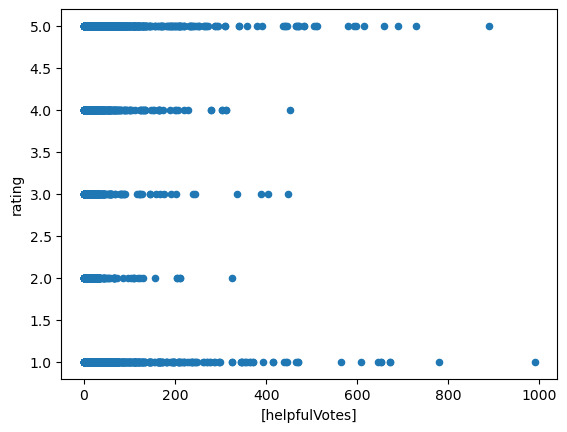

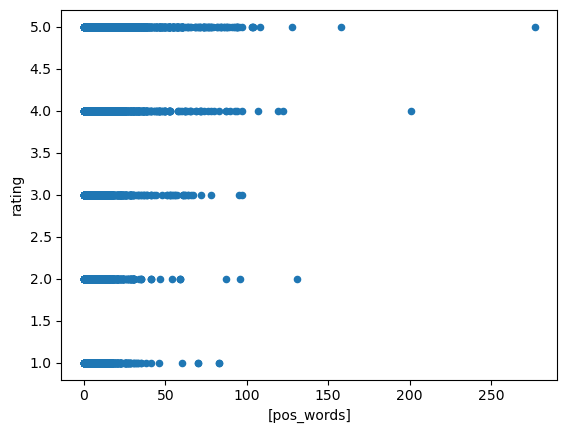

In [38]:
df.plot(x=['helpfulVotes'], y='rating', kind='scatter')	
df.plot(x=['pos_words'], y='rating', kind='scatter')